In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
print('X shape:', X.shape)
print('Classes:', set(y))

X shape: (569, 30)
Classes: {0, 1}


In [4]:
# Масштабирование данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

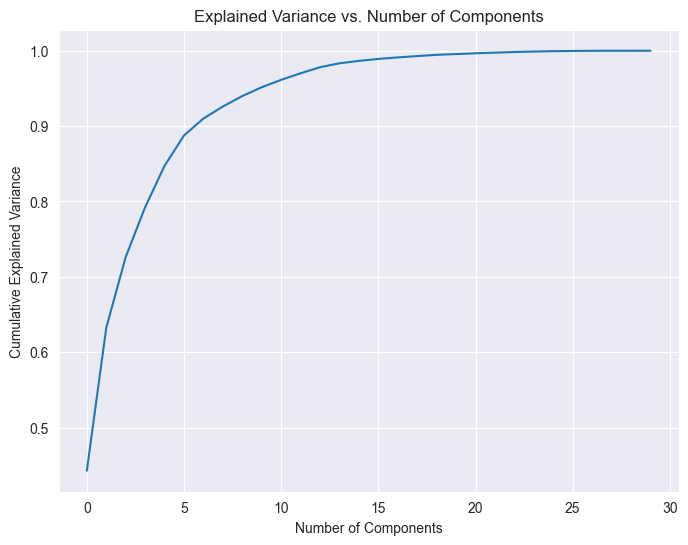

In [5]:
# Выбор количества компонент
pca = PCA().fit(X)

# Визуализация
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

Выбор количества компонент зависит от точности, которую мы хотим получить. Для достижения >95% точности нам достаточно уменьшения до 10 компонент.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=42)
# Предсказание с использованием всех компонент
model = LogisticRegression()
model.fit(X_train, y_train)
print('All components:', model.score(X_test, y_test))

All components: 0.9723618090452262


In [7]:
# Предсказание с использованием 10 компонент
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = LogisticRegression()
model.fit(X_train_pca, y_train)
print('10 components:', model.score(X_test_pca, y_test))

10 components: 0.9773869346733668


Как видно, точность предсказания с использованием 10 компонент осталась примерно на том же уровне, что и при использовании всех компонент.
Численно даже показала лучший результат. Этому могло быть несколько причин:

* Уменьшение шума: При уменьшении размерности вы удаляете ненужные признаки, которые могут быть шумовыми или неинформативными. Это позволяет модели линейной регрессии сфокусироваться на более важных и информативных признаках, что может улучшить ее производительность.

* Борьба с мультиколлинеарностью: Высокая размерность может привести к мультиколлинеарности, когда признаки сильно коррелируют друг с другом. Это может сделать оценку параметров модели менее стабильной. Снижение размерности может помочь справиться с этой проблемой.

* Меньше данных для обработки: При уменьшении размерности модели требуется меньше данных для обучения, что может ускорить процесс обучения и уменьшить вероятность переобучения модели.

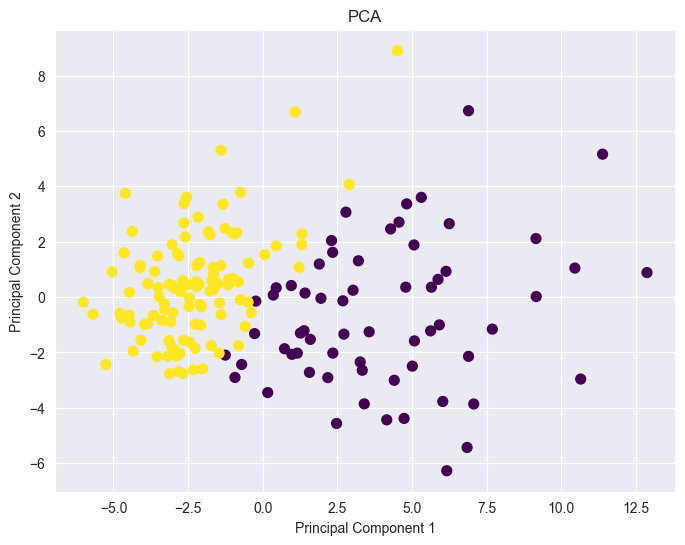

In [8]:
# Визуализация по 2 первым компонентам
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.grid(True)
plt.show()

# LDA
Так как классов в данном задании всего 2, то количество компонент в LDA не может превышать 1.

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

model = LogisticRegression()
model.fit(X_train_lda, y_train)
y_pred = model.predict(X_test_lda)
print(f"LDA-based Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.2f}")

LDA-based Logistic Regression Accuracy: 0.94


Полученная точность на задачу классификации с использованием LDA составила 0.94, что также является хорошим результатом.

# Рассмотрим пример с использованием PCA и LDA на задаче с регрессией

In [10]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

X = housing.data
y = housing.target

print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [11]:
# Масштабирование данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

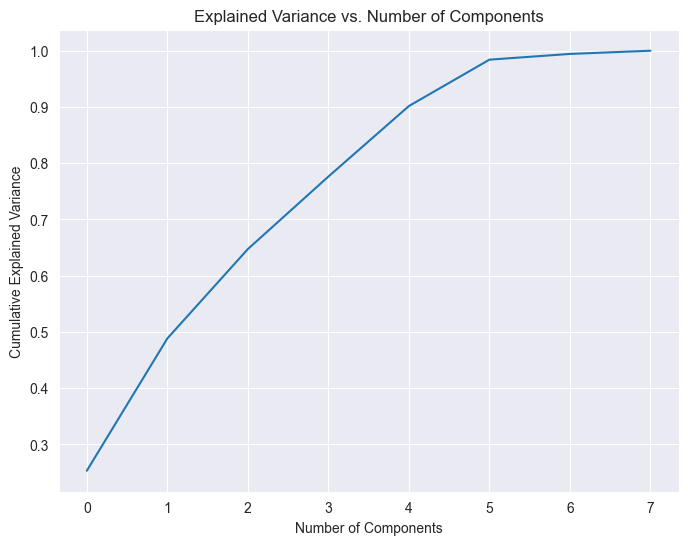

In [12]:
# Выбор количества компонент
pca = PCA().fit(X)

# Визуализация
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

Несмотря на то, что высокая точность достигается и с 1 компонентой, но для увеличения точности можно использовать 2 компоненты.

In [13]:
from sklearn.linear_model import LinearRegression

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Предсказание с использованием всех компонент
model = LinearRegression()
model.fit(X_train, y_train)
print('All components:', model.score(X_test, y_test))

All components: 0.5957702326061662


In [14]:
# Предсказание с использованием 2 компонент
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = LinearRegression()
model.fit(X_train_pca, y_train)
print('2 components:', model.score(X_test_pca, y_test))

2 components: 0.5052740738405221


In [15]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the California Housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

# Discretize the target variable into classes
y = pd.qcut(y, q=3, labels=[0, 1, 2])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply LDA to the standardized data
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# Print the number of components
print(f'Number of components: {X_train_lda.shape[1]}')

# Train a logistic regression model on the transformed data
classifier = LogisticRegression()
classifier.fit(X_train_lda, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test_lda)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(y_test, y_pred))


Number of components: 2
Accuracy: 0.6954134366925064
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      2061
           1       0.56      0.61      0.58      2049
           2       0.76      0.73      0.75      2082

    accuracy                           0.70      6192
   macro avg       0.70      0.70      0.70      6192
weighted avg       0.70      0.70      0.70      6192



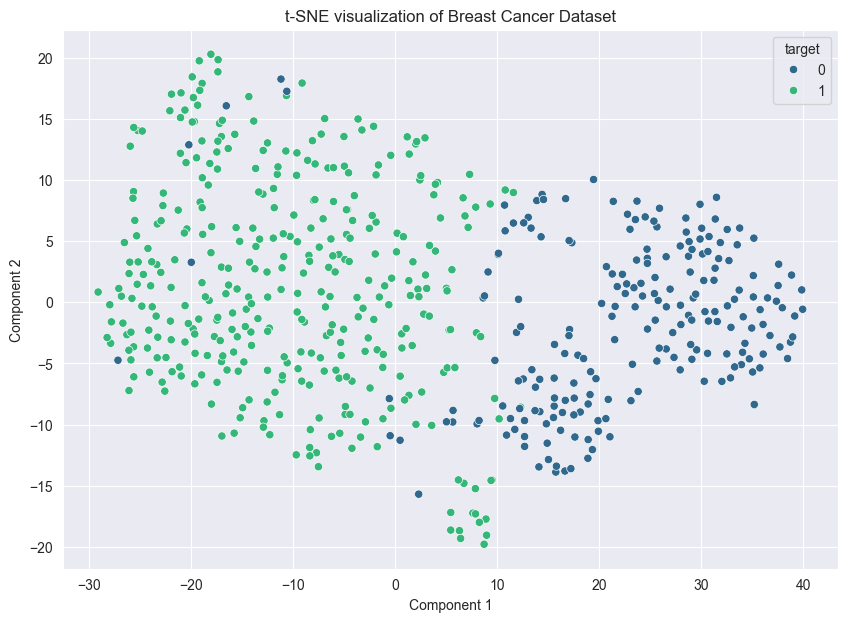

In [16]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = load_breast_cancer()
X = data.data
y = data.target

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Преобразование результатов в DataFrame для удобства визуализации
df_tsne = pd.DataFrame(X_tsne, columns=['Component 1', 'Component 2'])
df_tsne['target'] = y

# Визуализация
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Component 1', y='Component 2', hue='target', palette='viridis', data=df_tsne)
plt.title('t-SNE visualization of Breast Cancer Dataset')
plt.show()
